In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import qmc

In [279]:
def random_normal_vector(d,mu, sigma):
    normal_vector = np.random.normal(loc=mu, scale=sigma, size=d)
    return  normal_vector


Standard Brownian Motion Simulation

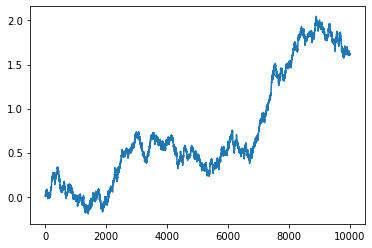

numpy.ndarray

In [ ]:
T = 1
d = 10000
delta_t = T/d
#create lower trinangular matrix with ones
lower_tri_matr = np.tril(np.ones([d,d]))
A = math.sqrt(delta_t)*lower_tri_matr
#create Brownian motion
w = A.dot(random_normal_vector(d,0,1))
plt.plot(w)
plt.show()


Beispiel für Asset

In [ ]:
#example
s_0 = 100
mu = 0.045
sigma = 0.3

s = np.zeros(d+1) #+1 weil d mal simuliert wird und aber der Startpreis des Assets auch in dem Vektor steht
s[0] = s_0
delta_s = []

delta_w = np.concatenate((w[0],np.diff(w)),axis=None)

for i in range(d):
    delta_s.append(mu*s[i]*delta_t + sigma*s[i]*delta_w[i])
    s[i+1] = s[i] + delta_s[i]

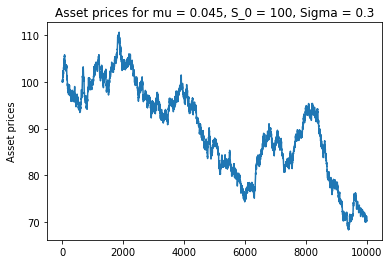

In [ ]:
plt.plot(s)
plt.title("Asset prices for mu = " + str(mu) + ", S_0 = " + str(s_0) + ", Sigma = " + str(sigma))
plt.ylabel("Asset prices")
plt.show()


Brownian Bridges: case = equal length intervals

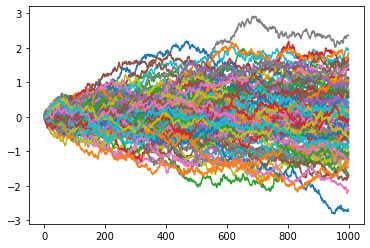

In [ ]:
import numpy
import six
from matplotlib import pyplot


seed = 0
N = 1000 # wahrscheinlich Anzahl der sample points
M = 100 #wahrscheinlich Anzahl der simulierten Pfade

#numpy.random.seed(seed)


def sample_path_batch(M, N):
    N_angepasst = N +1 #da hier die W_0 = 0 mit im Vektor ist. So haben wir am Ende N W Differenzen
    T = 1.0
    dt = T / N
    dt_sqrt = numpy.sqrt(dt)
    W = numpy.empty((M, N_angepasst), dtype=numpy.float32)
    W[:,N_angepasst-1] = np.sqrt(T)*np.random.randn(M) #hier 1 reinschreiben wenn alle Pfade gleichen Endwert haben sollen
    #W[:,N_angepasst-1] = 0
    W[:, 0] = 0
    for n in six.moves.range(N_angepasst - 2):
        t = n * dt
        z = numpy.random.randn(M)
        a = (1 - dt / (1 - t))
        W[:, n + 1] = a * W[:, n] + (1-a) * W[:,N_angepasst-1] + dt_sqrt * np.sqrt(a)*z
    return W


W = sample_path_batch(M, N)
pyplot.plot(W.T)
pyplot.show()

Damit erzeugte Asset prices

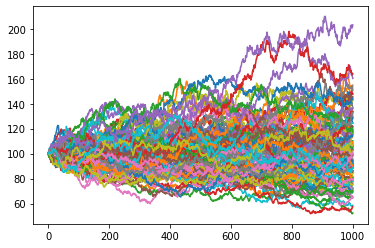

In [ ]:
#example
from numpy import dtype


S_0 = 100
mu = 0.045
sigma = 0.3
delta_t = 1/1000

S = np.empty((M,N+1),dtype = np.float32) #+1 weil d mal simuliert wird und aber der Startpreis des Assets auch in dem Vektor steht
S[:,0] = S_0
delta_S = np.empty((M, N), dtype=numpy.float32)

delta_W = np.diff(W,axis = 1)

for i in range(N):
    delta_S[:,i] = mu * delta_t * S[:,i] + sigma*S[:,i]*delta_W[:,i]
    S[:,i+1] = S[:,i] + delta_S[:,i]

plt.plot(S.T)
plt.show()

Payoff function for ratched digital option

In [ ]:
#WICHTIG: S_0 muss im Vektor S sein!!! (per Definition)
def ratched_option(d,S): 
    indic = np.asarray([1 if s > 0 else 0 for s in np.diff(S)])
    payoff = np.average(indic*S[1:(S.size)])  #python spezifisch fehlt dann das erste Element
    return payoff
ratched_option(d,s)

48.92065849465151

Low disrrepancy sequences

In [ ]:
Sobol_seq = qmc.Sobol(d = 2, scramble = False) # weil scramble ist noch irgendein Extraschritt und default ist True

In [ ]:
Sobol_seq.random(100)

array([[0.       , 0.       ],
       [0.5      , 0.5      ],
       [0.75     , 0.25     ],
       [0.25     , 0.75     ],
       [0.375    , 0.375    ],
       [0.875    , 0.875    ],
       [0.625    , 0.125    ],
       [0.125    , 0.625    ],
       [0.1875   , 0.3125   ],
       [0.6875   , 0.8125   ],
       [0.9375   , 0.0625   ],
       [0.4375   , 0.5625   ],
       [0.3125   , 0.1875   ],
       [0.8125   , 0.6875   ],
       [0.5625   , 0.4375   ],
       [0.0625   , 0.9375   ],
       [0.09375  , 0.46875  ],
       [0.59375  , 0.96875  ],
       [0.84375  , 0.21875  ],
       [0.34375  , 0.71875  ],
       [0.46875  , 0.09375  ],
       [0.96875  , 0.59375  ],
       [0.71875  , 0.34375  ],
       [0.21875  , 0.84375  ],
       [0.15625  , 0.15625  ],
       [0.65625  , 0.65625  ],
       [0.90625  , 0.40625  ],
       [0.40625  , 0.90625  ],
       [0.28125  , 0.28125  ],
       [0.78125  , 0.78125  ],
       [0.53125  , 0.03125  ],
       [0.03125  , 0.53125  ],
       [

Uniform random variable to normal rv

In [ ]:
from scipy.stats import norm
norm.ppf(0.8,loc = 0, scale = 1) #scale is standard deviation not variance!!!

0.8416212335729143

BB für MBS selber

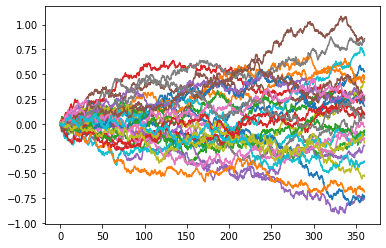

array([[ 0.00000000e+00, -1.24007747e-02, -1.93226476e-02, ...,
         5.27389189e-01,  5.32679684e-01,  5.25815447e-01],
       [ 0.00000000e+00, -5.87977339e-03,  1.29157851e-02, ...,
         4.56176095e-01,  4.52297458e-01,  4.70770864e-01],
       [ 0.00000000e+00,  1.33339054e-02,  2.07599044e-02, ...,
        -1.04208115e-01, -1.07397406e-01, -1.11339488e-01],
       ...,
       [ 0.00000000e+00,  3.84521637e-04, -2.21057478e-03, ...,
         5.65661584e-02,  5.95089715e-02,  5.88930434e-02],
       [ 0.00000000e+00,  9.17322504e-04,  2.91712385e-03, ...,
        -1.70582499e-01, -1.78404078e-01, -1.91811851e-01],
       [ 0.00000000e+00, -9.66763248e-04, -1.03115588e-02, ...,
        -3.86650619e-01, -3.75818048e-01, -3.82709890e-01]])

In [ ]:
number_paths = 30
months = 360                   #Anzahl der simulierten Monate
sigma = np.sqrt(0.0004)
k = 10
M = 2**k                    #numer of simulated points excluding the first one
delta_t = months/M                     #delta_t : Differenz der Punkte in absoluter Angabe
h = M                       #h : Differenz der Punkte in Indexpunkten
X = np.empty((number_paths,M+1))       #+1 damit die 0 am Anfang mit dabei ist
X[:,0] = 0
X[:,M] = sigma * np.sqrt(M * delta_t) * np.random.randn(number_paths)
for i in range(k):
    h = int(h/2)
    pos = h
    for j in range(2**i):
        X[:,pos] = (1/2) * X[:,pos - h] + (1/2) * X[:,pos + h] + sigma * np.sqrt((1/2) * h * delta_t) * np.random.randn(number_paths)
        #print(pos)
        pos = pos + 2*h
time = np.linspace(0,months,M+1)
plt.plot(time, X.T)
plt.show()
X

ab hier komplette MBS standard MC Simulation

i_K und w_k für MBS erstellen

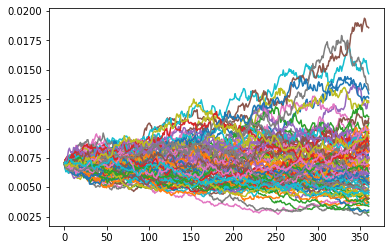

In [366]:
#create normal distributed vector
def random_normal_vector(d,mu, sigma):
    normal_vector = np.random.normal(loc=mu, scale=sigma, size=d)
    return  normal_vector


sigma = np.sqrt(0.0004)
months = 360
number_paths = 100

delta_t = 1 #month
w = np.empty((number_paths,months))

for m in range(number_paths):
    #create lower trinangular matrix with ones
    lower_tri_matr = np.tril(np.ones([months,months]))
    A = math.sqrt(delta_t)*lower_tri_matr
    #create Brownian motion
    w[m,:] = A.dot(random_normal_vector(months,0,sigma))
    
#create differences of the Wiener process
delta_w = np.concatenate((w[:,0].reshape(number_paths,1),np.diff(w, axis=1)),axis=1)


K_0 = math.exp(-(sigma**2)/2)

#X_diff = np.diff(X,axis = 1)    für BB MC Simulation
i_k = np.empty((number_paths,months+1))     #+1 weil i_0 mit drin ist
i_k[:,0] = 0.007
for n in range(number_paths):
    for j in range(months):
        j = j+1
        i_k[n,j] = i_k[n,j-1]*K_0*math.exp(delta_w[n,j-1])
plt.plot(i_k.T)
plt.show()

K1 = 0.01
K2 = -0.005
K3 = 10
K4 = 0.5

w_k = np.empty((number_paths,months))
w_k = K1+K2*np.arctan(K3 * i_k + K4)


MBS MC Simulation

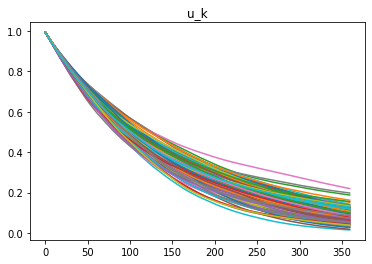

13065.176524395636


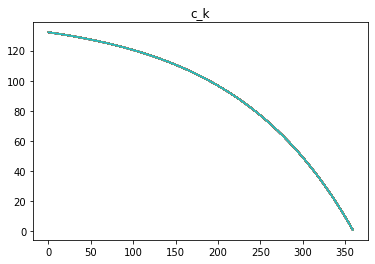

In [367]:
c = 100 #monthly payment (beliebig?)

u_k = np.empty((number_paths,months))
for k in range(months):
    u_k[:,k] = np.prod(1/(i_k[:,0:k+1] + 1), axis = 1)

c_k = np.ones((number_paths,months))
for k in range(months):                 
    for j in range(months - (k+1)):
        j = j + 1                   #damit man nicht bei 0 anfängt, erster Summand ist schon 1
        c_k[:,k] = c_k[:,k] + (1 + i_k[:,0])**(-j)

r_k = np.empty((number_paths, months))
for k in range(months):
    r_k[:,k] = np.prod(1-w_k[:,0:k+1] , axis = 1)

m_k = np.empty((number_paths, months))
for k in range(months):
    m_k[:,k] = c*r_k[:,k]*((1-w_k[:,k]) + w_k[:,k]*c_k[:,k])


plt.plot(u_k.T)
plt.title("u_k")
plt.show()


plt.plot(c_k.T)
plt.title("c_k")
plt.show




expectation = np.sum(np.sum(u_k * m_k,axis=1))/number_paths
print(expectation)

<function matplotlib.pyplot.show(*args, **kw)>

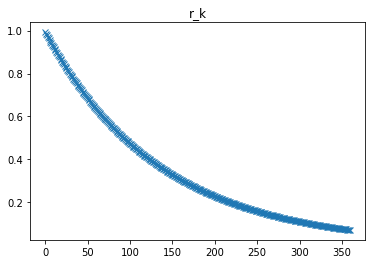

In [368]:
#plt.plot(m_k.T)
#plt.title("m_k")
#plt.show

plt.plot(r_k[5,:].T,'x')
plt.title("r_k")
plt.show

Integralberechnung mit Sympy

In [6]:
from sympy import *

In [8]:
x,y = symbols('x y') 
f=x**2 + x + 1 
integrate(f, x)

x**3/3 + x**2/2 + x

In [9]:
sigma = np.sqrt(0.0004)
K_0 = math.exp(-(sigma**2)/2)
K1 = 0.01
K2 = -0.005
K3 = 10
K4 = 0.5

